<a href="https://colab.research.google.com/github/LucasThierry/Neural-Networks-21.1/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto - Análise de Risco de Crédito

### **Grupo: Josenildo Vicente de Araújo (jva@cin.ufpe.br), Lucas Thierry Chaves Muniz (ltcm@cin.ufpe.br), Nicholas Henrique Justino Ferreira (nhjf@cin.ufpe.br), Renato Joaquim Miranda Ferreira (rjmf@cin.ufpe.br)**

O seguinte Projeto tem como objetivo praticar os conceitos e teorias aprendidas na disciplina de Redes Neurais a respeito

#Organização e separação dos dados

In [6]:
! pip install optuna
import numpy as np
import pandas as pd
import gdown
import os
import optuna

AttributeError: ignored

In [9]:
def pull_dataset_file(name_file):
  file_id = '11JVg39uGJsYZZPKssnVoALl4A4RG7gI8'
  url = 'https://drive.google.com/uc?id='+file_id

  gdown.download(url, name_file, quiet=False)


In [10]:
name_file = "TRNcod.csv"

In [11]:
if not os.path.exists('/content/'+name_file):
  print("Arquivo não existe ainda")
  print("Fazendo downloading...")
  pull_dataset_file(name_file)
  print("Download finalizado!")

In [12]:
print("Lendo arquivo...")
dataset = pd.read_csv(name_file)

Lendo arquivo...


In [13]:
dataset 

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,NIVEL_RELACIONAMENTO_CREDITO02,BANCO_REST_IRPF_ULTIMA_1,BANCO_REST_IRPF_ULTIMA_2,BANCO_REST_IRPF_ULTIMA_3,BANCO_REST_IRPF_ULTIMA_4,BANCO_REST_IRPF_ULTIMA_5,BANCO_REST_IRPF_ULTIMA_6,BANCO_REST_IRPF_ULTIMA_7,ATIVIDADE_EMAIL,EXPOSICAO_ENDERECO,EXPOSICAO_EMAIL,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,ATUALIZACAO_EMAIL,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,VALOR_PARCELA_BOLSA_FAMILIA,FLAG_BOLSA_FAMILIA_1,SIGLA_PARTIDO_FILIADO_1,SIGLA_PARTIDO_FILIADO_2,SIGLA_PARTIDO_FILIADO_3,SIGLA_PARTIDO_FILIADO_4,SIGLA_PARTIDO_FILIADO_5,SIGLA_PARTIDO_FILIADO_6,SIGLA_PARTIDO_FILIADO_7,FLAG_FILIADO_PARTIDO_POLITICO_1,FLAG_PROUNI_1,...,CEP1_3,CEP1_4,CEP1_5,CEP2_1,CEP2_2,CEP2_3,CEP2_4,CEP2_5,CEP2_6,CEP2_7,CEP2_8,CEP2_9,CEP3_1,CEP3_2,CEP3_3,CEP3_4,CEP3_5,CEP3_6,CEP3_7,CEP3_8,CEP3_9,CEP3_10,CEP3_11,CEP3_12,CEP4_1,CEP4_2,CEP4_3,CEP4_4,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.135098,1,0.222222,0.0,0,0,0,0,0,1,1,5.881235e-18,0.041667,0.000000,0.000000,0.105588,0.796392,-5.140958e-17,0.0,0.1,1.316491e-01,0.000000,0,1,1,1,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,1,0,0.273504,1,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.013889,0.000000,0.000000,0.147356,0.979968,-5.140958e-17,0.0,0.0,-2.188272e-17,0.000000,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0
2,2,1,0,1,0,0,1,0,0.281910,0,1.000000,0.0,0,0,0,0,0,1,1,5.881235e-18,0.500000,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.0,-2.188272e-17,0.000000,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0
3,3,1,1,1,0,0,0,0,0.225741,0,0.111111,0.0,1,1,0,0,0,0,0,4.788559e-01,0.083333,0.115789,0.055556,0.147356,0.398645,8.325188e-02,0.2,0.3,4.859488e-01,0.000000,0,1,1,1,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,0
4,4,1,1,0,0,0,1,0,0.480403,0,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.208333,0.000000,0.111111,0.151604,0.398645,-5.140958e-17,0.0,0.5,1.689438e-01,0.458333,1,1,1,1,0,0,0,0,0,1,...,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389191,389191,1,1,0,0,0,0,1,0.787827,1,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.055556,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.1,8.574793e-02,0.000000,0,1,1,1,0,0,0,0,0,1,...,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,1
389192,389192,1,0,1,0,0,0,1,0.470010,1,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.208333,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.1,8.546104e-02,0.000000,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,1,0
389193,389193,0,1,0,1,0,0,1,0.436048,0,0.000000,0.0,0,0,0,0,0,1,1,5.881235e-18,0.111111,0.000000,0.083333,0.152666,0.398645,-5.140958e-17,0.0,0.4,1.698044e-01,0.000000,0,1,1,1,0,0,0,0,0,0,...,0,1,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1
389194,389194,1,0,1,0,1,0,0,0.677875,0,0.111111,0.0,1,1,0,0,0,0,0,5.881235e-18,0.388889,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.1,1.388212e-01,0.000000,0,1,1,1,0,0,0,0,0,1,...,1,1,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1,1,1,1,0


In [14]:
dataset[(dataset['IND_BOM_1_1']==1) & (dataset['IND_BOM_1_2']==1)]

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,NIVEL_RELACIONAMENTO_CREDITO02,BANCO_REST_IRPF_ULTIMA_1,BANCO_REST_IRPF_ULTIMA_2,BANCO_REST_IRPF_ULTIMA_3,BANCO_REST_IRPF_ULTIMA_4,BANCO_REST_IRPF_ULTIMA_5,BANCO_REST_IRPF_ULTIMA_6,BANCO_REST_IRPF_ULTIMA_7,ATIVIDADE_EMAIL,EXPOSICAO_ENDERECO,EXPOSICAO_EMAIL,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,ATUALIZACAO_EMAIL,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,VALOR_PARCELA_BOLSA_FAMILIA,FLAG_BOLSA_FAMILIA_1,SIGLA_PARTIDO_FILIADO_1,SIGLA_PARTIDO_FILIADO_2,SIGLA_PARTIDO_FILIADO_3,SIGLA_PARTIDO_FILIADO_4,SIGLA_PARTIDO_FILIADO_5,SIGLA_PARTIDO_FILIADO_6,SIGLA_PARTIDO_FILIADO_7,FLAG_FILIADO_PARTIDO_POLITICO_1,FLAG_PROUNI_1,...,CEP1_3,CEP1_4,CEP1_5,CEP2_1,CEP2_2,CEP2_3,CEP2_4,CEP2_5,CEP2_6,CEP2_7,CEP2_8,CEP2_9,CEP3_1,CEP3_2,CEP3_3,CEP3_4,CEP3_5,CEP3_6,CEP3_7,CEP3_8,CEP3_9,CEP3_10,CEP3_11,CEP3_12,CEP4_1,CEP4_2,CEP4_3,CEP4_4,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2


In [15]:
dataset[dataset['IND_BOM_1_1']==1].groupby("IND_BOM_1_2").count()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,NIVEL_RELACIONAMENTO_CREDITO02,BANCO_REST_IRPF_ULTIMA_1,BANCO_REST_IRPF_ULTIMA_2,BANCO_REST_IRPF_ULTIMA_3,BANCO_REST_IRPF_ULTIMA_4,BANCO_REST_IRPF_ULTIMA_5,BANCO_REST_IRPF_ULTIMA_6,BANCO_REST_IRPF_ULTIMA_7,ATIVIDADE_EMAIL,EXPOSICAO_ENDERECO,EXPOSICAO_EMAIL,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,ATUALIZACAO_EMAIL,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,VALOR_PARCELA_BOLSA_FAMILIA,FLAG_BOLSA_FAMILIA_1,SIGLA_PARTIDO_FILIADO_1,SIGLA_PARTIDO_FILIADO_2,SIGLA_PARTIDO_FILIADO_3,SIGLA_PARTIDO_FILIADO_4,SIGLA_PARTIDO_FILIADO_5,SIGLA_PARTIDO_FILIADO_6,SIGLA_PARTIDO_FILIADO_7,FLAG_FILIADO_PARTIDO_POLITICO_1,FLAG_PROUNI_1,...,CEP1_2,CEP1_3,CEP1_4,CEP1_5,CEP2_1,CEP2_2,CEP2_3,CEP2_4,CEP2_5,CEP2_6,CEP2_7,CEP2_8,CEP2_9,CEP3_1,CEP3_2,CEP3_3,CEP3_4,CEP3_5,CEP3_6,CEP3_7,CEP3_8,CEP3_9,CEP3_10,CEP3_11,CEP3_12,CEP4_1,CEP4_2,CEP4_3,CEP4_4,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1
IND_BOM_1_2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,...,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098


In [16]:
dataset[dataset['IND_BOM_1_2']==1].groupby("IND_BOM_1_1").count()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,NIVEL_RELACIONAMENTO_CREDITO02,BANCO_REST_IRPF_ULTIMA_1,BANCO_REST_IRPF_ULTIMA_2,BANCO_REST_IRPF_ULTIMA_3,BANCO_REST_IRPF_ULTIMA_4,BANCO_REST_IRPF_ULTIMA_5,BANCO_REST_IRPF_ULTIMA_6,BANCO_REST_IRPF_ULTIMA_7,ATIVIDADE_EMAIL,EXPOSICAO_ENDERECO,EXPOSICAO_EMAIL,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,ATUALIZACAO_EMAIL,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,VALOR_PARCELA_BOLSA_FAMILIA,FLAG_BOLSA_FAMILIA_1,SIGLA_PARTIDO_FILIADO_1,SIGLA_PARTIDO_FILIADO_2,SIGLA_PARTIDO_FILIADO_3,SIGLA_PARTIDO_FILIADO_4,SIGLA_PARTIDO_FILIADO_5,SIGLA_PARTIDO_FILIADO_6,SIGLA_PARTIDO_FILIADO_7,FLAG_FILIADO_PARTIDO_POLITICO_1,FLAG_PROUNI_1,...,CEP1_2,CEP1_3,CEP1_4,CEP1_5,CEP2_1,CEP2_2,CEP2_3,CEP2_4,CEP2_5,CEP2_6,CEP2_7,CEP2_8,CEP2_9,CEP3_1,CEP3_2,CEP3_3,CEP3_4,CEP3_5,CEP3_6,CEP3_7,CEP3_8,CEP3_9,CEP3_10,CEP3_11,CEP3_12,CEP4_1,CEP4_2,CEP4_3,CEP4_4,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_2
IND_BOM_1_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,...,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098


In [17]:
dataset.drop(columns=['INDEX'], inplace=True)

In [18]:
dataset.describe()

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,NIVEL_RELACIONAMENTO_CREDITO02,BANCO_REST_IRPF_ULTIMA_1,BANCO_REST_IRPF_ULTIMA_2,BANCO_REST_IRPF_ULTIMA_3,BANCO_REST_IRPF_ULTIMA_4,BANCO_REST_IRPF_ULTIMA_5,BANCO_REST_IRPF_ULTIMA_6,BANCO_REST_IRPF_ULTIMA_7,ATIVIDADE_EMAIL,EXPOSICAO_ENDERECO,EXPOSICAO_EMAIL,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,ATUALIZACAO_EMAIL,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,VALOR_PARCELA_BOLSA_FAMILIA,FLAG_BOLSA_FAMILIA_1,SIGLA_PARTIDO_FILIADO_1,SIGLA_PARTIDO_FILIADO_2,SIGLA_PARTIDO_FILIADO_3,SIGLA_PARTIDO_FILIADO_4,SIGLA_PARTIDO_FILIADO_5,SIGLA_PARTIDO_FILIADO_6,SIGLA_PARTIDO_FILIADO_7,FLAG_FILIADO_PARTIDO_POLITICO_1,FLAG_PROUNI_1,RENDA_VIZINHANCA_1,...,CEP1_3,CEP1_4,CEP1_5,CEP2_1,CEP2_2,CEP2_3,CEP2_4,CEP2_5,CEP2_6,CEP2_7,CEP2_8,CEP2_9,CEP3_1,CEP3_2,CEP3_3,CEP3_4,CEP3_5,CEP3_6,CEP3_7,CEP3_8,CEP3_9,CEP3_10,CEP3_11,CEP3_12,CEP4_1,CEP4_2,CEP4_3,CEP4_4,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
count,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,3.891960e+05,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,3.891960e+05,389196.000000,389196.000000,389196.000000,3.891960e+05,3.891960e+05,3.891960e+05,389196.000000,389196.000000,3.891960e+05,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,...,389196.000000,389196.00000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.00000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000
mean,0.889274,0.691952,0.476552,0.296195,0.241179,0.218011,0.186836,4.552049e-01,0.521514,0.134915,0.002071,0.076828,0.033330,0.017015,0.015362,0.011848,0.926109,0.919508,1.259255e-01,0.093091,0.037783,0.063266,1.959749e-01,5.938128e-01,7.677453e-02,0.099535,0.159769,2.032828e-01,0.057815,0.211993,0.964923,0.892833,0.852432,0.086612,0.074618,0.069137,0.059446,0.229172,0.578819,0.079364,...,0.389344,0.36792,0.352971,0.791557,0.587570,0.468240,0.414927,0.372478,0.356062,0.341576,0.337578,0.330011,0.750403,0.607314,0.450488,0.395862,0.379302,0.333115,0.329926,0.320209,0.346702,0.332462,0.375312,0.378904,0.806082,0.691636,0.598113,0.51306,0.475825,0.437052,0.423378,0.417540,0.425708,0.459820,0.440842,0.436896,0.433709,0.440339,0.655449,0.344551
std,0.313793,0.461687,0.499451,0.456579,0.427799,0.412895,0.389781,2.537459e-01,0.499538,0.133136,0.043717,0.266318,0.179498,0.129326,0.122990,0.108200,0.261593,0.272053,2.457121e-01,0.160208,0.110964,0.144057,1.781598e-01,3.524863e-01,1.888183e-01,0.195807,0.205465,2.510087e-01,0.145072,0.408721,0.183976,0.309326,0.354672,0.281266,0.262774,0.253688,0.236457,0.420301,0.493749,0.270306,...,0.487602,0.48224,0.477894,0.406195,0.492272,0.498991,0.492710,0.483465,0.478835,0.474239,0.472884,0.470217,0.432780,0.488349,0.497543,0.489036,0.485214,0.471328,0.470187,0.466557,0.475920,0.471096,0.484204,0.485115,0.395366,0.461818,0.490280,0.49983,0.499416,0.496022,0.494095,0.493154,0.494451,0.498384,0.496489,0.496002,0.495587,0.496428,0.475222,0.475222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.506237e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.881235e-18,0.000000,0.000000,0.000000,2.044015e-16,1.591218e-16,-5.140958e-17,0.000000,0.000000,-2.188272e-17,0.000000,0.000000,0

In [19]:
print("Separando classes...")
class_1 = dataset[dataset['IND_BOM_1_1']==1]
class_2 = dataset[dataset['IND_BOM_1_2']==1]
class_1 = class_1.sample(frac=1)
class_2 = class_2.sample(frac=1)

Separando classes...


In [20]:
print("Dividindo dados em treinamento, validação e teste")
class_1_train, class_1_validate, class_1_test = np.split(class_1,[int(0.5*len(class_1)),int(0.75*len(class_1))])
class_2_train, class_2_validate, class_2_test = np.split(class_2,[int(0.5*len(class_2)),int(0.75*len(class_2))])  

Dividindo dados em treinamento, validação e teste


In [21]:
print("Classe 1 - ","Treino:",len(class_1_train),"Validação:",len(class_1_validate),"Teste:",len(class_1_test))
print("Classe 2 - ","Treino:",len(class_2_train),"Validação:",len(class_2_validate),"Teste:",len(class_2_test))

Classe 1 -  Treino: 127549 Validação: 63774 Teste: 63775
Classe 2 -  Treino: 67049 Validação: 33524 Teste: 33525


In [22]:
print("Repetindo dados de treino e validação da classe 2")
while len(class_2_train) < len(class_1_train):
  count = (len(class_1_train)-len(class_2_train)) % len(class_2_train)
  class_2_train = pd.concat([class_2_train[:count],class_2_train])
while len(class_2_validate) < len(class_1_validate):
  count = (len(class_1_validate)-len(class_2_validate)) % len(class_2_validate)
  class_2_validate = pd.concat([class_2_validate[:count],class_2_validate])


Repetindo dados de treino e validação da classe 2


In [23]:
print("Classe 1 - ","Treino:",len(class_1_train),"Validação:",len(class_1_validate),"Teste:",len(class_1_test))
print("Classe 2 - ","Treino:",len(class_2_train),"Validação:",len(class_2_validate),"Teste:",len(class_2_test))

Classe 1 -  Treino: 127549 Validação: 63774 Teste: 63775
Classe 2 -  Treino: 127549 Validação: 63774 Teste: 33525


In [24]:
print("Juntandos dados das classes de acordo com o tipo de separação")
data_train = pd.concat([class_1_train,class_2_train])
data_train = data_train.sample(frac=1)
data_validate = pd.concat([class_1_validate,class_2_validate])
data_validate = data_validate.sample(frac=1)
data_test = pd.concat([class_1_test,class_2_test])
data_test = data_test.sample(frac=1)

Juntandos dados das classes de acordo com o tipo de separação


In [25]:
print("Treinamento:",len(data_train),"Validação:",len(data_validate),"Teste:",len(data_test))

Treinamento: 255098 Validação: 127548 Teste: 97300


In [26]:
print(data_train.iloc[0])

UF_1           1.0
UF_2           1.0
UF_3           1.0
UF_4           0.0
UF_5           0.0
              ... 
CEP4_12        0.0
CEP4_13        1.0
CEP4_14        1.0
IND_BOM_1_1    1.0
IND_BOM_1_2    0.0
Name: 301547, Length: 245, dtype: float64


In [27]:
x_train = data_train.iloc[:,:-2]
y_train = data_train.iloc[:,-2:]
x_validate = data_validate.iloc[:,:-2]
y_validate = data_validate.iloc[:,-2:]
x_test = data_test.iloc[:,:-2]
y_test = data_test.iloc[:,-2:]

In [28]:
y_train[(y_train['IND_BOM_1_1']==1) & (y_train['IND_BOM_1_2']==1)]

,IND_BOM_1_1,IND_BOM_1_2


In [29]:
y_validate[(y_validate['IND_BOM_1_1']==1) & (y_validate['IND_BOM_1_2']==1)]

,IND_BOM_1_1,IND_BOM_1_2


In [30]:
y_test[(y_test['IND_BOM_1_1']==1) & (y_test['IND_BOM_1_2']==1)]

,IND_BOM_1_1,IND_BOM_1_2


In [31]:
y_train2 = y_train.drop(columns=['IND_BOM_1_2'])
y_validate2 = y_validate.drop(columns=['IND_BOM_1_2'])
y_test2 = y_test.drop(columns=['IND_BOM_1_2'])

In [32]:
y_train2[y_train2['IND_BOM_1_1']==1].count()

IND_BOM_1_1    127549
dtype: int64

In [33]:
y_train2[y_train2['IND_BOM_1_1']==0].count()

IND_BOM_1_1    127549
dtype: int64

In [34]:
y_validate2[y_validate2['IND_BOM_1_1']==1].count()

IND_BOM_1_1    63774
dtype: int64

In [35]:
y_validate2[y_validate2['IND_BOM_1_1']==0].count()

IND_BOM_1_1    63774
dtype: int64

In [36]:
y_test2[y_test2['IND_BOM_1_1']==1].count()

IND_BOM_1_1    63775
dtype: int64

In [37]:
y_test2[y_test2['IND_BOM_1_1']==0].count()

IND_BOM_1_1    33525
dtype: int64

#Classificadores

In [38]:
!pip install scikit-plot
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, roc_curve, roc_auc_score, average_precision_score, ConfusionMatrixDisplay, auc
from sklearn.metrics import accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import tensorflow as tf

In [39]:
def my_metrics(y_true,y_pred):
  y_true = y_true['IND_BOM_1_1']
  y_pred = y_pred['IND_BOM_1_1']
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true')
  print(classification_report(y_true,y_pred))
  print("Erro quadrático médio: ",mean_squared_error(y_true,y_pred))
  print("Auroc:", roc_auc_score(y_true,y_pred))
  print("Precisão média: ", average_precision_score(y_true, y_pred))
  print()
  

In [40]:
def pred_name_columns(arr):
    result = pd.DataFrame(arr, columns = ['IND_BOM_1_1'])
    return result

In [41]:
def pred_scores_transf(arr):
  pred_score = []
  for a,b in arr:
    if a > b:
      pred_score.append([1,0])
    else:
      pred_score.append([0,1])
  
  return pred_name_columns(pred_score)

In [42]:
@tf.function
def ks(y_true,y_pred):
    y_true = tf.reshape(y_true,(-1,))
    y_pred = tf.reshape(y_pred,(-1,))
    length = tf.shape(y_true)[0]
    t = tf.math.top_k(y_pred,k = length,sorted =False)
    y_pred_sorted = tf.gather(y_pred,t.indices)
    y_true_sorted = tf.gather(y_true,t.indices)
    cum_positive_ratio = tf.truediv(
        tf.cumsum(y_true_sorted),tf.reduce_sum(y_true_sorted))
    cum_negative_ratio = tf.truediv(
        tf.cumsum(1- y_true_sorted),tf.reduce_sum(1- y_true_sorted))
    ks_value = tf.reduce_max(tf.abs(cum_positive_ratio - cum_negative_ratio))
    return ks_value

##MLP

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, optimizers, losses
from sklearn.neural_network import MLPClassifier
from scipy import stats

In [ ]:
input_dim = x_train.shape[1]

### Modelo 1

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=(100), solver='adam', activation='relu', learning_rate_init=0.001, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=10, validation_fraction=0.1).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.62      0.69      0.65     63774
           1       0.65      0.58      0.61     63774

    accuracy                           0.63    127548
   macro avg       0.64      0.63      0.63    127548
weighted avg       0.64      0.63      0.63    127548

Erro quadrático médio:  0.3658152225044689
Auroc: 0.6341847774955311
Precisão média:  0.587288428521549



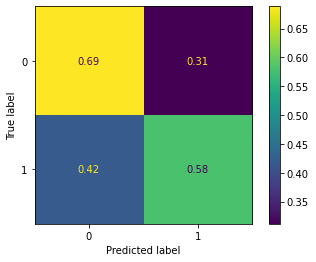

In [ ]:
mlp1_pred_class_val = mlp1.predict(x_validate.to_numpy())
y_pred_mlp1_val = pred_name_columns(mlp1_pred_class_val)
my_metrics(y_validate2,y_pred_mlp1_val)

              precision    recall  f1-score   support

           0       0.46      0.69      0.55     33525
           1       0.78      0.58      0.67     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.67      0.62      0.63     97300

Erro quadrático médio:  0.38214799588900306
Auroc: 0.6341050153308012
Precisão média:  0.7274558937293654



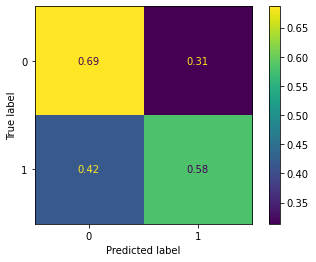

In [ ]:
mlp1_pred_class_test = mlp1.predict(x_test.to_numpy())
y_pred_mlp1_test = pred_name_columns(mlp1_pred_class_test)
my_metrics(y_test2,y_pred_mlp1_test)

In [ ]:
print(confusion_matrix(y_test2, mlp1_pred_class_test))

[[23011 10514]
 [26669 37106]]


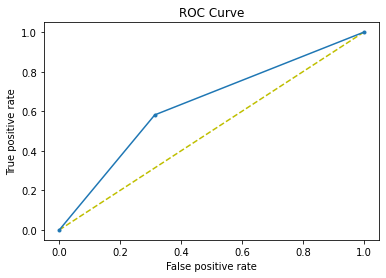

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test2, mlp1_pred_class_test)
plt.figure(1)
plt.plot([0,1], [0,1] , 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

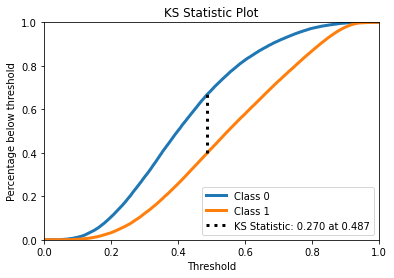

In [ ]:
mlp1_prb_val = mlp1.predict_proba(x_validate.to_numpy())
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), mlp1_prb_val)
plt.show()

In [ ]:
mlp1_pred_class_val

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
mlp1_pred_class_test

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
rf_prb_val

array([[0.45670894, 0.54329106],
       [0.20808223, 0.79191777],
       [0.63428831, 0.36571169],
       ...,
       [0.24471276, 0.75528724],
       [0.40164563, 0.59835437],
       [0.13892301, 0.86107699]])

### Modelo 2

In [ ]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100), solver='adam', activation='relu', learning_rate_init=0.001, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.46      0.67      0.55     33525
           1       0.77      0.59      0.67     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.67      0.62      0.63     97300

Erro quadrático médio:  0.38147995889003083
Auroc: 0.6296980640423796
Precisão média:  0.7244088660104173



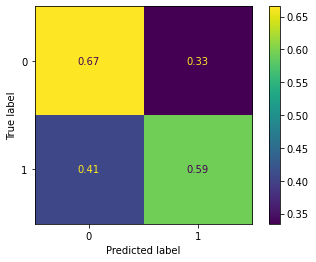

In [ ]:
mlp2_pred_class_test = mlp2.predict(x_test.to_numpy())
y_pred_mlp2_test = pred_name_columns(mlp2_pred_class_test)
my_metrics(y_test2,y_pred_mlp2_test)

In [ ]:
print(confusion_matrix(y_test2, mlp2_pred_class_test))

[[22316 11209]
 [25909 37866]]


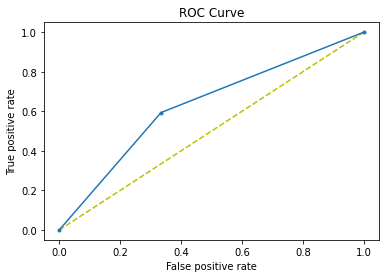

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test2, mlp2_pred_class_test)
plt.figure(1)
plt.plot([0,1], [0,1] , 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

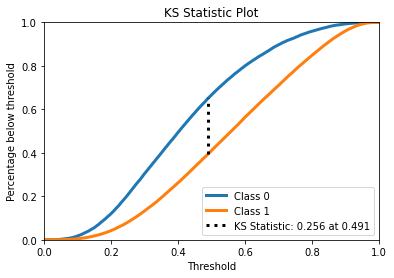

In [ ]:
mlp2_prb_val = mlp2.predict_proba(x_validate.to_numpy())
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), mlp2_prb_val)
plt.show()

### Modelo 3

In [ ]:
mlp3 = MLPClassifier(hidden_layer_sizes=(100), solver='adam', activation='relu', learning_rate_init=0.01, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.48      0.64      0.55     33525
           1       0.77      0.64      0.70     63775

    accuracy                           0.64     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.67      0.64      0.65     97300

Erro quadrático médio:  0.36216855087358685
Auroc: 0.638621639800859
Precisão média:  0.7291231394981479



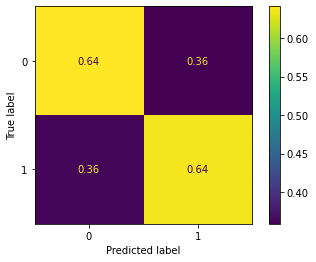

In [ ]:
mlp3_pred_class_test = mlp3.predict(x_test.to_numpy())
y_pred_mlp3_test = pred_name_columns(mlp3_pred_class_test)
my_metrics(y_test2,y_pred_mlp3_test)

In [ ]:
print(confusion_matrix(y_test2, mlp3_pred_class_test))

[[21495 12030]
 [23209 40566]]


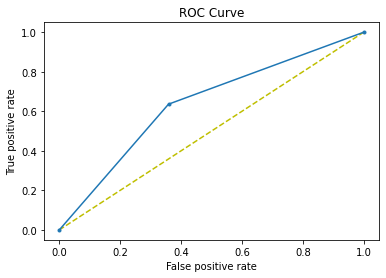

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test2, mlp3_pred_class_test)
plt.figure(1)
plt.plot([0,1], [0,1] , 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

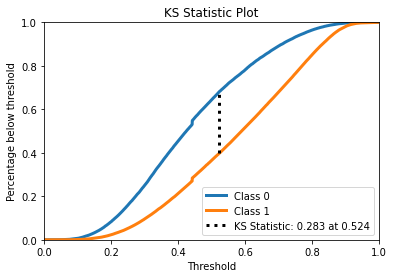

In [ ]:
mlp3_prb_val = mlp3.predict_proba(x_validate.to_numpy())
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), mlp3_prb_val)
plt.show()

### Modelo 4

In [ ]:
mlp4 = MLPClassifier(hidden_layer_sizes=(100), solver='adam', activation='relu', learning_rate_init=0.1, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00     33525
           1       0.66      1.00      0.79     63775

    accuracy                           0.66     97300
   macro avg       0.33      0.50      0.40     97300
weighted avg       0.43      0.66      0.52     97300

Erro quadrático médio:  0.34455292908530316
Auroc: 0.5
Precisão média:  0.6554470709146968



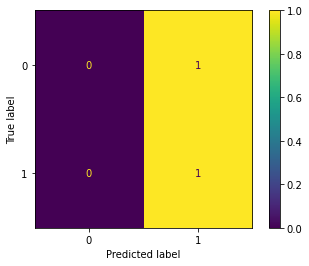

In [ ]:
mlp4_pred_class_test = mlp4.predict(x_test.to_numpy())
y_pred_mlp4_test = pred_name_columns(mlp4_pred_class_test)
my_metrics(y_test2,y_pred_mlp4_test)

In [ ]:
print(confusion_matrix(y_test2, mlp4_pred_class_test))

[[    0 33525]
 [    0 63775]]


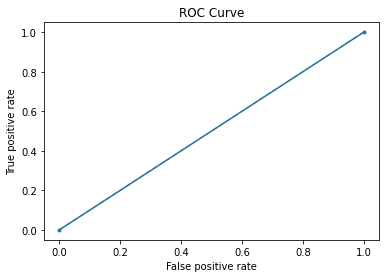

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test2, mlp4_pred_class_test)
plt.figure(1)
plt.plot([0,1], [0,1] , 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

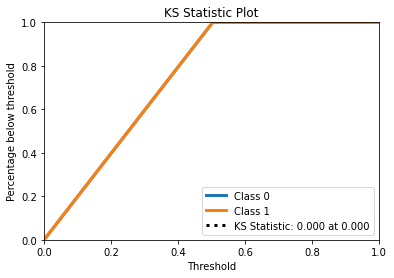

In [ ]:
mlp4_prb_val = mlp4.predict_proba(x_validate.to_numpy())
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), mlp4_prb_val)
plt.show()

### Modelo 5

In [ ]:
mlp5 = MLPClassifier(hidden_layer_sizes=(100), solver='adam', activation='relu', learning_rate_init=0.005, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.47      0.69      0.56     33525
           1       0.78      0.58      0.67     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.64      0.61     97300
weighted avg       0.67      0.62      0.63     97300

Erro quadrático médio:  0.3784994861253854
Auroc: 0.6382181835083317
Precisão média:  0.7300314096326784



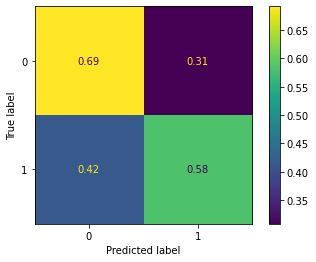

In [ ]:
mlp5_pred_class_test = mlp5.predict(x_test.to_numpy())
y_pred_mlp5_test = pred_name_columns(mlp5_pred_class_test)
my_metrics(y_test2,y_pred_mlp5_test)

In [ ]:
print(confusion_matrix(y_test2, mlp5_pred_class_test))

[[23199 10326]
 [26502 37273]]


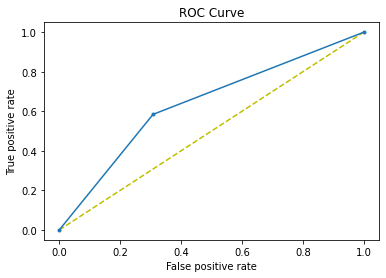

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test2, mlp5_pred_class_test)
plt.figure(1)
plt.plot([0,1], [0,1] , 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

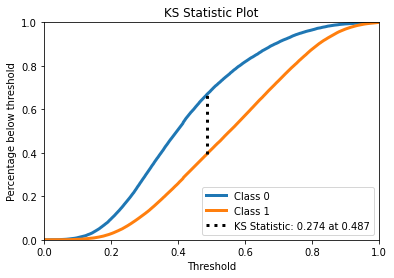

In [ ]:
mlp5_prb_val = mlp5.predict_proba(x_validate.to_numpy())
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), mlp5_prb_val)
plt.show()

### Modelo 6

Escolhendo o Modelo 5 como melhor modelo e alterando seus hiperparâmetros:

In [ ]:
mlp6 = MLPClassifier(hidden_layer_sizes=(100,50), solver='adam', activation='relu', learning_rate_init=0.005, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.47      0.68      0.56     33525
           1       0.78      0.59      0.67     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.64      0.61     97300
weighted avg       0.67      0.62      0.63     97300

Erro quadrático médio:  0.37606372045220965
Auroc: 0.638166249670042
Precisão média:  0.7298037370304271



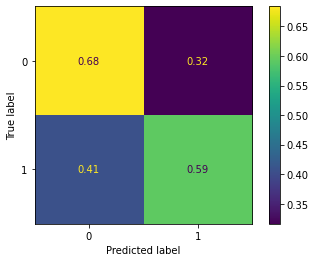

In [ ]:
mlp6_pred_class_test = mlp6.predict(x_test.to_numpy())
y_pred_mlp6_test = pred_name_columns(mlp6_pred_class_test)
my_metrics(y_test2,y_pred_mlp6_test)

In [ ]:
print(confusion_matrix(y_test2, mlp6_pred_class_test))

[[22929 10596]
 [25995 37780]]


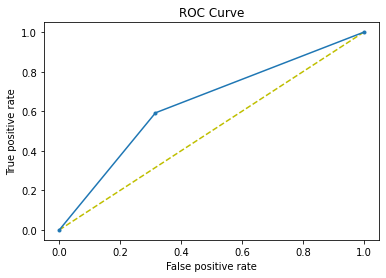

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test2, mlp6_pred_class_test)
plt.figure(1)
plt.plot([0,1], [0,1] , 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

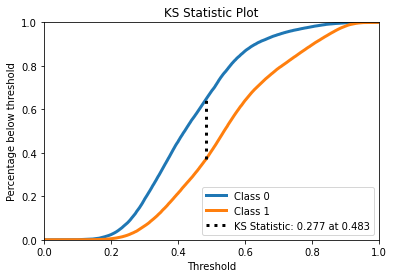

In [ ]:
mlp6_prb_val = mlp6.predict_proba(x_validate.to_numpy())
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), mlp6_prb_val)
plt.show()

### Modelo 7

Escolhendo o Modelo 5 como melhor modelo e alterando seus hiperparâmetros:

In [ ]:
mlp7 = MLPClassifier(hidden_layer_sizes=(75,25), solver='adam', activation='relu', learning_rate_init=0.005, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.48      0.61      0.54     33525
           1       0.76      0.65      0.70     63775

    accuracy                           0.64     97300
   macro avg       0.62      0.63      0.62     97300
weighted avg       0.66      0.64      0.65     97300

Erro quadrático médio:  0.36232271325796506
Auroc: 0.6308144047851861
Precisão média:  0.7239970914070228



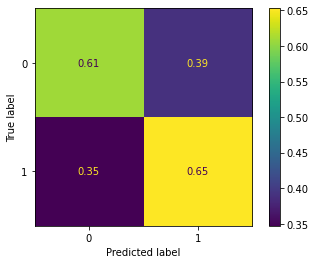

In [ ]:
mlp7_pred_class_test = mlp7.predict(x_test.to_numpy())
y_pred_mlp7_test = pred_name_columns(mlp7_pred_class_test)
my_metrics(y_test2,y_pred_mlp7_test)

In [ ]:
print(confusion_matrix(y_test2, mlp7_pred_class_test))

[[20408 13117]
 [22137 41638]]


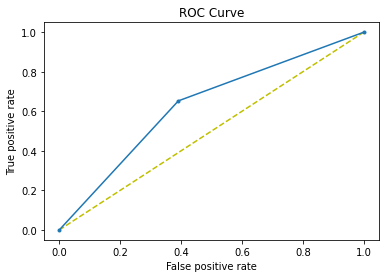

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test2, mlp7_pred_class_test)
plt.figure(1)
plt.plot([0,1], [0,1] , 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

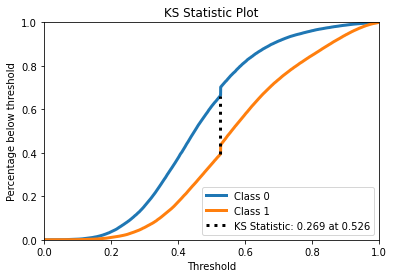

In [ ]:
mlp7_prb_val = mlp7.predict_proba(x_validate.to_numpy())
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), mlp7_prb_val)
plt.show()

### Modelo 8

Escolhendo o Modelo 5 como melhor modelo e alterando seus hiperparâmetros:

In [ ]:
mlp8 = MLPClassifier(hidden_layer_sizes=(50,50), solver='adam', activation='relu', learning_rate_init=0.005, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.47      0.65      0.55     33525
           1       0.77      0.62      0.69     63775

    accuracy                           0.63     97300
   macro avg       0.62      0.64      0.62     97300
weighted avg       0.67      0.63      0.64     97300

Erro quadrático médio:  0.368448098663926
Auroc: 0.6359253188716041
Precisão média:  0.7277280608549401



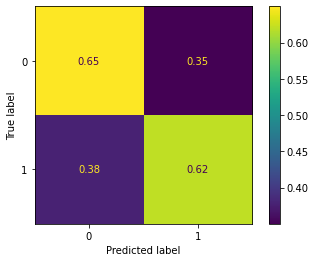

In [ ]:
mlp8_pred_class_test = mlp8.predict(x_test.to_numpy())
y_pred_mlp8_test = pred_name_columns(mlp8_pred_class_test)
my_metrics(y_test2,y_pred_mlp8_test)

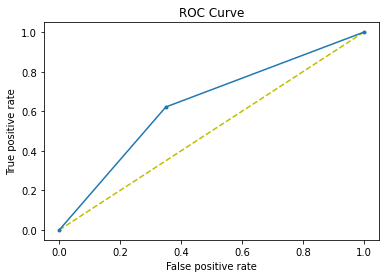

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test2, mlp8_pred_class_test)
plt.figure(1)
plt.plot([0,1], [0,1] , 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

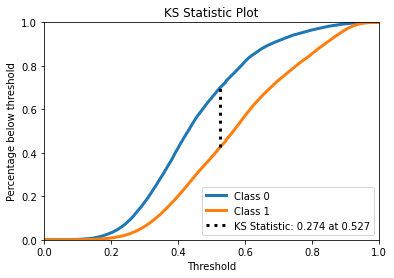

In [ ]:
mlp8_prb_val = mlp8.predict_proba(x_validate.to_numpy())
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), mlp8_prb_val)
plt.show()

### Modelo 9

Escolhendo o Modelo 5 como melhor modelo e alterando seus hiperparâmetros:

In [ ]:
mlp9 = MLPClassifier(hidden_layer_sizes=(100,50,25), solver='adam', activation='relu', learning_rate_init=0.005, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.48      0.66      0.55     33525
           1       0.78      0.62      0.69     63775

    accuracy                           0.63     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.67      0.63      0.64     97300

Erro quadrático médio:  0.36738951695786226
Auroc: 0.6397605945351665
Precisão média:  0.7302545634310771



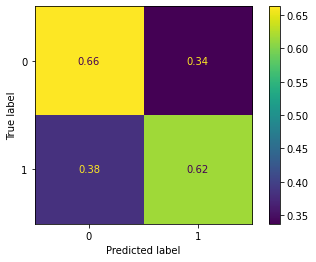

In [ ]:
mlp9_pred_class_test = mlp9.predict(x_test.to_numpy())
y_pred_mlp9_test = pred_name_columns(mlp9_pred_class_test)
my_metrics(y_test2,y_pred_mlp9_test)

In [ ]:
print(confusion_matrix(y_test2, mlp9_pred_class_test))

[[22219 11306]
 [24441 39334]]


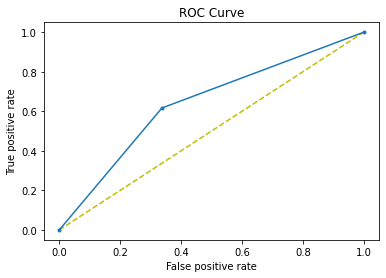

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test2, mlp9_pred_class_test)
plt.figure(1)
plt.plot([0,1], [0,1] , 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

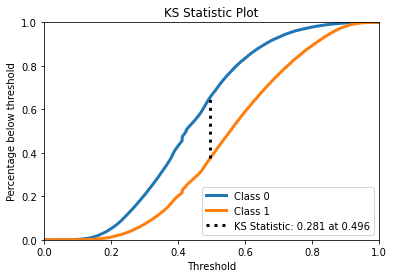

In [ ]:
mlp9_prb_val = mlp9.predict_proba(x_validate.to_numpy())
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), mlp9_prb_val)
plt.show()

In [ ]:
def mlp(trial):
    layers              = trial.suggest_int('layers', 1, 2)
    solver              = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
    neurons             = trial.suggest_int('neurons', 2, 32)
    activation          = trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
    learning_rate       = trial.suggest_categorical('learning rate', ['constant', 'adaptive'])
    learning_rate_init  = trial.suggest_float('initial learning rate', 0.001, 0.1)
    mlp = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    solver=solver,
                    activation=activation,
                    learning_rate=learning_rate,
                    hidden_layer_sizes=(neurons,) if layers==1 else (neurons, neurons),
                    learning_rate_init=learning_rate_init, 
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

    mlp_pred_class_test = mlp.predict(x_test.to_numpy())
    # rf_prb_test = random_forest.predict_proba(x_test)
    y_pred_mlp_test = pred_name_columns(mlp_pred_class_test)
    # my_metrics(y_test2,y_pred_rf_test)
    # skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), rf_prb_test)
    # plt.show()a
    acc = accuracy_score(y_test2,y_pred_rf_test)
    return acc

study_0 = optuna.create_study(direction="maximize")
study_0.optimize(mlp, n_trials=10)

[I 2021-12-15 21:53:34,451] A new study created in memory with name: no-name-1779307c-0cc3-4f13-8031-ef2589076c0f
[I 2021-12-15 21:55:50,532] Trial 0 finished with value: 0.6338540596094553 and parameters: {'layers': 2, 'solver': 'lbfgs', 'neurons': 11, 'activation': 'identity', 'learning rate': 'adaptive', 'initial learning rate': 0.047002937807334305}. Best is trial 0 with value: 0.6338540596094553.
[I 2021-12-15 21:58:04,275] Trial 1 finished with value: 0.6338540596094553 and parameters: {'layers': 2, 'solver': 'adam', 'neurons': 32, 'activation': 'tanh', 'learning rate': 'adaptive', 'initial learning rate': 0.006363326192740088}. Best is trial 0 with value: 0.6338540596094553.
[I 2021-12-15 21:58:34,229] Trial 2 finished with value: 0.6338540596094553 and parameters: {'layers': 1, 'solver': 'adam', 'neurons': 16, 'activation': 'tanh', 'learning rate': 'constant', 'initial learning rate': 0.03645833513437148}. Best is trial 0 with value: 0.6338540596094553.
[I 2021-12-15 22:14:50,0

In [ ]:
study_0.best_params

{'activation': 'identity',
 'initial learning rate': 0.047002937807334305,
 'layers': 2,
 'learning rate': 'adaptive',
 'neurons': 11,
 'solver': 'lbfgs'}

In [ ]:
mlp_opt = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    solver='lbfgs',
                    activation='identity',
                    learning_rate= 'adaptive',
                    learning_rate_init=np.arange( 0.01, 0.047),
                    hidden_layer_sizes=(11,2),
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.47      0.66      0.55     33525
           1       0.77      0.60      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.67      0.62      0.63     97300

Erro quadrático médio:  0.3776978417266187
Auroc: 0.6312249644902452
Precisão média:  0.7251840040853625



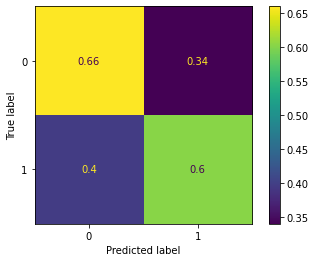

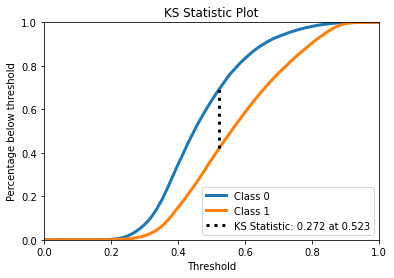

In [ ]:
mlp_pred_class_test = mlp_opt.predict(x_test.to_numpy())
mlp_prb_test = mlp_opt.predict_proba(x_test)
y_pred_mlp_test = pred_name_columns(mlp_pred_class_test)
my_metrics(y_test2,y_pred_mlp_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), rf_prb_test)
plt.show()

##Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
estimators = [50,100,128]
maxDeep = [2,5,8]
maxFeatures = [None, 'sqrt']

params: estimadores 50, maxDepht 2, Features None
Matriz confusão:
[[43323 20451]
 [31698 32076]]



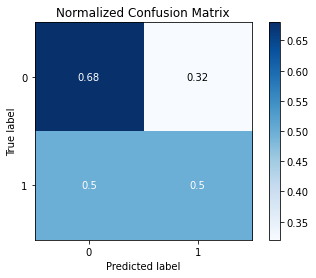

              precision    recall  f1-score   support

           0       0.58      0.68      0.62     63774
           1       0.61      0.50      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.59      0.59      0.59    127548
weighted avg       0.59      0.59      0.59    127548


Erro quadrático médio:  0.4088578417536927

Auroc:
(array([0.        , 0.32067927, 1.        ]), array([0.        , 0.50296359, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23124 10401]
 [31660 32115]]



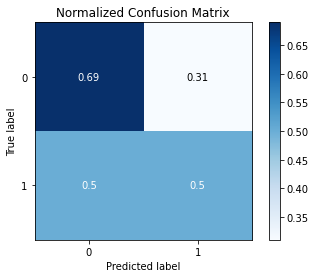

              precision    recall  f1-score   support

           0       0.42      0.69      0.52     33525
           1       0.76      0.50      0.60     63775

    accuracy                           0.57     97300
   macro avg       0.59      0.60      0.56     97300
weighted avg       0.64      0.57      0.58     97300


Erro quadrático médio:  0.43228160328879756

Auroc:
(array([0.        , 0.31024609, 1.        ]), array([0.        , 0.50356723, 1.        ]), array([2, 1, 0]))
params: estimadores 50, maxDepht 2, Features sqrt
Matriz confusão:
[[43620 20154]
 [31751 32023]]



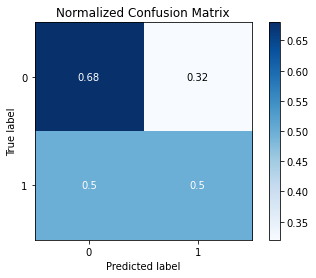

              precision    recall  f1-score   support

           0       0.58      0.68      0.63     63774
           1       0.61      0.50      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.60      0.59      0.59    127548
weighted avg       0.60      0.59      0.59    127548


Erro quadrático médio:  0.4069448364537272

Auroc:
(array([0.       , 0.3160222, 1.       ]), array([0.        , 0.50213253, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22985 10540]
 [31693 32082]]



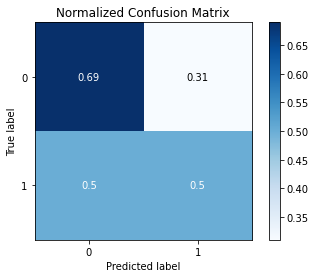

              precision    recall  f1-score   support

           0       0.42      0.69      0.52     33525
           1       0.75      0.50      0.60     63775

    accuracy                           0.57     97300
   macro avg       0.59      0.59      0.56     97300
weighted avg       0.64      0.57      0.57     97300


Erro quadrático médio:  0.43404933196300105

Auroc:
(array([0.        , 0.31439224, 1.        ]), array([0.        , 0.50304978, 1.        ]), array([2, 1, 0]))
params: estimadores 50, maxDepht 5, Features None
Matriz confusão:
[[42960 20814]
 [27331 36443]]



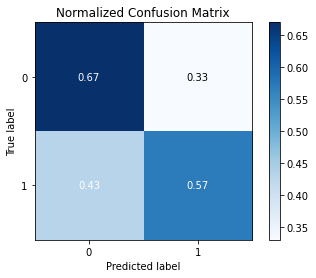

              precision    recall  f1-score   support

           0       0.61      0.67      0.64     63774
           1       0.64      0.57      0.60     63774

    accuracy                           0.62    127548
   macro avg       0.62      0.62      0.62    127548
weighted avg       0.62      0.62      0.62    127548


Erro quadrático médio:  0.377465738388685

Auroc:
(array([0.        , 0.32637125, 1.        ]), array([0.        , 0.57143977, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22771 10754]
 [27055 36720]]



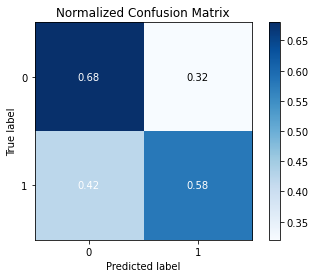

              precision    recall  f1-score   support

           0       0.46      0.68      0.55     33525
           1       0.77      0.58      0.66     63775

    accuracy                           0.61     97300
   macro avg       0.62      0.63      0.60     97300
weighted avg       0.66      0.61      0.62     97300


Erro quadrático médio:  0.38858170606372044

Auroc:
(array([0.        , 0.32077554, 1.        ]), array([0.        , 0.57577421, 1.        ]), array([2, 1, 0]))
params: estimadores 50, maxDepht 5, Features sqrt
Matriz confusão:
[[43897 19877]
 [28719 35055]]



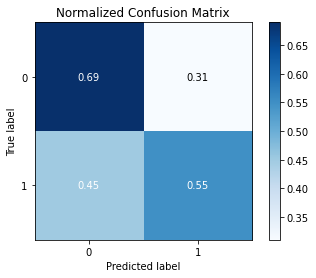

              precision    recall  f1-score   support

           0       0.60      0.69      0.64     63774
           1       0.64      0.55      0.59     63774

    accuracy                           0.62    127548
   macro avg       0.62      0.62      0.62    127548
weighted avg       0.62      0.62      0.62    127548


Erro quadrático médio:  0.381001662119359

Auroc:
(array([0.        , 0.31167874, 1.        ]), array([0.        , 0.54967542, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23181 10344]
 [28560 35215]]



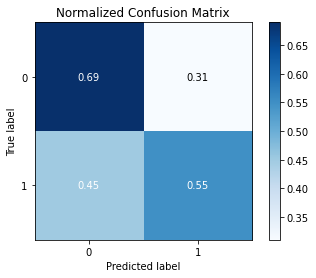

              precision    recall  f1-score   support

           0       0.45      0.69      0.54     33525
           1       0.77      0.55      0.64     63775

    accuracy                           0.60     97300
   macro avg       0.61      0.62      0.59     97300
weighted avg       0.66      0.60      0.61     97300


Erro quadrático médio:  0.3998355601233299

Auroc:
(array([0.        , 0.30854586, 1.        ]), array([0.        , 0.55217562, 1.        ]), array([2, 1, 0]))
params: estimadores 50, maxDepht 8, Features None
Matriz confusão:
[[42420 21354]
 [25071 38703]]



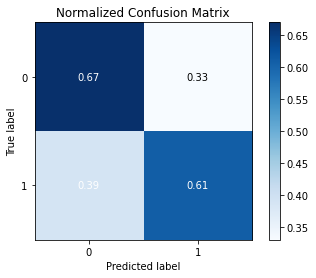

              precision    recall  f1-score   support

           0       0.63      0.67      0.65     63774
           1       0.64      0.61      0.63     63774

    accuracy                           0.64    127548
   macro avg       0.64      0.64      0.64    127548
weighted avg       0.64      0.64      0.64    127548


Erro quadrático médio:  0.3639806190610594

Auroc:
(array([0.        , 0.33483865, 1.        ]), array([0.        , 0.60687741, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22583 10942]
 [25009 38766]]



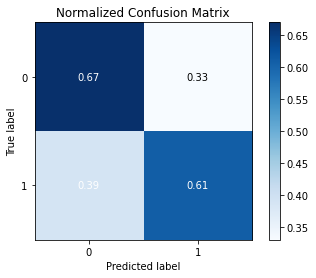

              precision    recall  f1-score   support

           0       0.47      0.67      0.56     33525
           1       0.78      0.61      0.68     63775

    accuracy                           0.63     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.67      0.63      0.64     97300


Erro quadrático médio:  0.369486125385406

Auroc:
(array([0.       , 0.3263833, 1.       ]), array([0.        , 0.60785574, 1.        ]), array([2, 1, 0]))
params: estimadores 50, maxDepht 8, Features sqrt
Matriz confusão:
[[43912 19862]
 [27353 36421]]



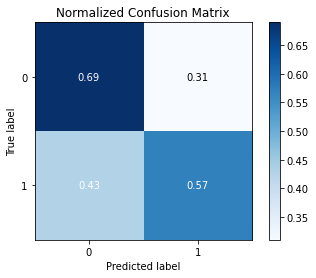

              precision    recall  f1-score   support

           0       0.62      0.69      0.65     63774
           1       0.65      0.57      0.61     63774

    accuracy                           0.63    127548
   macro avg       0.63      0.63      0.63    127548
weighted avg       0.63      0.63      0.63    127548


Erro quadrático médio:  0.37017436572898044

Auroc:
(array([0.        , 0.31144353, 1.        ]), array([0.       , 0.5710948, 1.       ]), array([2, 1, 0]))
Matriz confusão:
[[23240 10285]
 [27279 36496]]



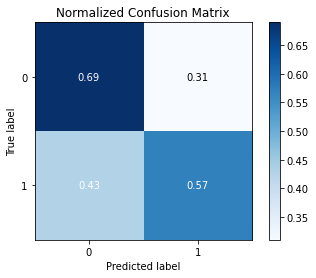

              precision    recall  f1-score   support

           0       0.46      0.69      0.55     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.61     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.67      0.61      0.62     97300


Erro quadrático médio:  0.38606372045220966

Auroc:
(array([0.        , 0.30678598, 1.        ]), array([0.        , 0.57226186, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 2, Features None
Matriz confusão:
[[43323 20451]
 [31695 32079]]



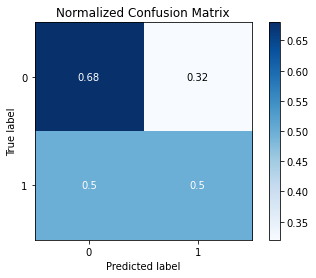

              precision    recall  f1-score   support

           0       0.58      0.68      0.62     63774
           1       0.61      0.50      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.59      0.59      0.59    127548
weighted avg       0.59      0.59      0.59    127548


Erro quadrático médio:  0.4088343211967259

Auroc:
(array([0.        , 0.32067927, 1.        ]), array([0.        , 0.50301063, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23122 10403]
 [31657 32118]]



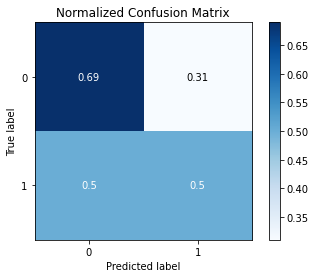

              precision    recall  f1-score   support

           0       0.42      0.69      0.52     33525
           1       0.76      0.50      0.60     63775

    accuracy                           0.57     97300
   macro avg       0.59      0.60      0.56     97300
weighted avg       0.64      0.57      0.58     97300


Erro quadrático médio:  0.4322713257965057

Auroc:
(array([0.        , 0.31030574, 1.        ]), array([0.        , 0.50361427, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 2, Features sqrt
Matriz confusão:
[[42994 20780]
 [31417 32357]]



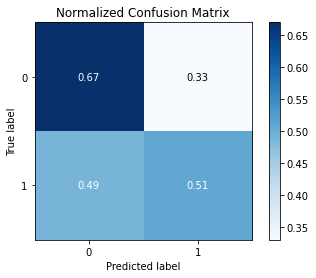

              precision    recall  f1-score   support

           0       0.58      0.67      0.62     63774
           1       0.61      0.51      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.59      0.59      0.59    127548
weighted avg       0.59      0.59      0.59    127548


Erro quadrático médio:  0.4092341706651614

Auroc:
(array([0.        , 0.32583812, 1.        ]), array([0.        , 0.50736977, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22596 10929]
 [31327 32448]]



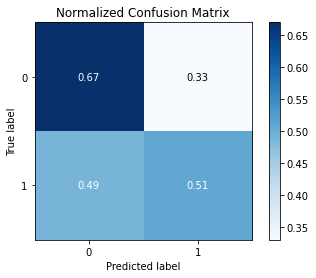

              precision    recall  f1-score   support

           0       0.42      0.67      0.52     33525
           1       0.75      0.51      0.61     63775

    accuracy                           0.57     97300
   macro avg       0.58      0.59      0.56     97300
weighted avg       0.63      0.57      0.58     97300


Erro quadrático médio:  0.4342857142857143

Auroc:
(array([0.        , 0.32599553, 1.        ]), array([0.        , 0.50878871, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 5, Features None
Matriz confusão:
[[43361 20413]
 [27630 36144]]



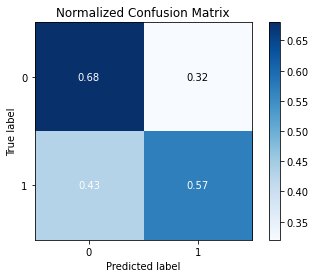

              precision    recall  f1-score   support

           0       0.61      0.68      0.64     63774
           1       0.64      0.57      0.60     63774

    accuracy                           0.62    127548
   macro avg       0.62      0.62      0.62    127548
weighted avg       0.62      0.62      0.62    127548


Erro quadrático médio:  0.3766660394518142

Auroc:
(array([0.        , 0.32008342, 1.        ]), array([0.        , 0.56675134, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22993 10532]
 [27354 36421]]



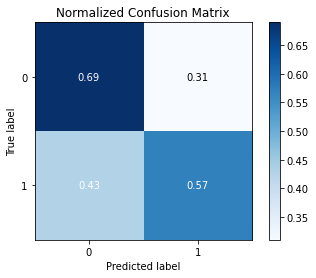

              precision    recall  f1-score   support

           0       0.46      0.69      0.55     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.61     97300
   macro avg       0.62      0.63      0.60     97300
weighted avg       0.67      0.61      0.62     97300


Erro quadrático médio:  0.3893730729701953

Auroc:
(array([0.        , 0.31415362, 1.        ]), array([0.        , 0.57108585, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 5, Features sqrt
Matriz confusão:
[[44323 19451]
 [29022 34752]]



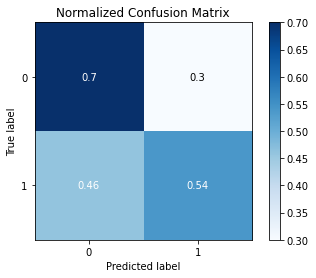

              precision    recall  f1-score   support

           0       0.60      0.70      0.65     63774
           1       0.64      0.54      0.59     63774

    accuracy                           0.62    127548
   macro avg       0.62      0.62      0.62    127548
weighted avg       0.62      0.62      0.62    127548


Erro quadrático médio:  0.38003731928372064

Auroc:
(array([0.       , 0.3049989, 1.       ]), array([0.        , 0.54492426, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23501 10024]
 [28904 34871]]



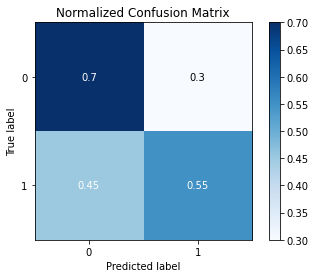

              precision    recall  f1-score   support

           0       0.45      0.70      0.55     33525
           1       0.78      0.55      0.64     63775

    accuracy                           0.60     97300
   macro avg       0.61      0.62      0.59     97300
weighted avg       0.66      0.60      0.61     97300


Erro quadrático médio:  0.40008221993833504

Auroc:
(array([0.        , 0.29900075, 1.        ]), array([0.        , 0.54678165, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 8, Features None
Matriz confusão:
[[42497 21277]
 [24971 38803]]



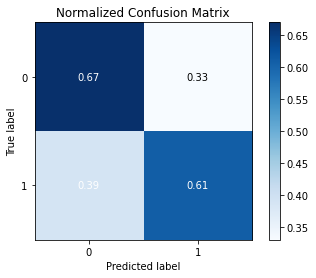

              precision    recall  f1-score   support

           0       0.63      0.67      0.65     63774
           1       0.65      0.61      0.63     63774

    accuracy                           0.64    127548
   macro avg       0.64      0.64      0.64    127548
weighted avg       0.64      0.64      0.64    127548


Erro quadrático médio:  0.3625929062000188

Auroc:
(array([0.        , 0.33363126, 1.        ]), array([0.        , 0.60844545, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22627 10898]
 [24830 38945]]



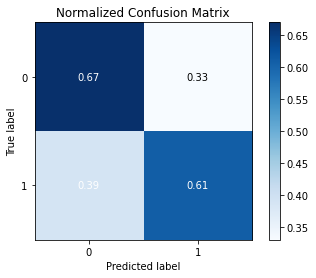

              precision    recall  f1-score   support

           0       0.48      0.67      0.56     33525
           1       0.78      0.61      0.69     63775

    accuracy                           0.63     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.68      0.63      0.64     97300


Erro quadrático médio:  0.36719424460431654

Auroc:
(array([0.        , 0.32507084, 1.        ]), array([0.        , 0.61066249, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 8, Features sqrt
Matriz confusão:
[[44148 19626]
 [27412 36362]]



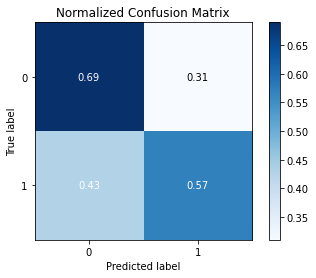

              precision    recall  f1-score   support

           0       0.62      0.69      0.65     63774
           1       0.65      0.57      0.61     63774

    accuracy                           0.63    127548
   macro avg       0.63      0.63      0.63    127548
weighted avg       0.63      0.63      0.63    127548


Erro quadrático médio:  0.36878665286793993

Auroc:
(array([0.        , 0.30774297, 1.        ]), array([0.        , 0.57016966, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23410 10115]
 [27245 36530]]



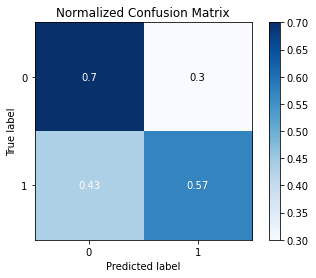

              precision    recall  f1-score   support

           0       0.46      0.70      0.56     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.64      0.61     97300
weighted avg       0.67      0.62      0.63     97300


Erro quadrático médio:  0.383967112024666

Auroc:
(array([0.        , 0.30171514, 1.        ]), array([0.        , 0.57279498, 1.        ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 2, Features None
Matriz confusão:
[[43323 20451]
 [31695 32079]]



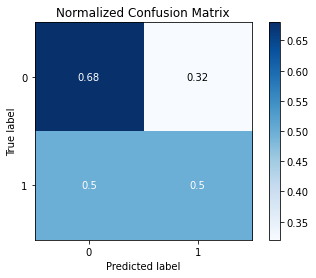

              precision    recall  f1-score   support

           0       0.58      0.68      0.62     63774
           1       0.61      0.50      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.59      0.59      0.59    127548
weighted avg       0.59      0.59      0.59    127548


Erro quadrático médio:  0.4088343211967259

Auroc:
(array([0.        , 0.32067927, 1.        ]), array([0.        , 0.50301063, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23122 10403]
 [31657 32118]]



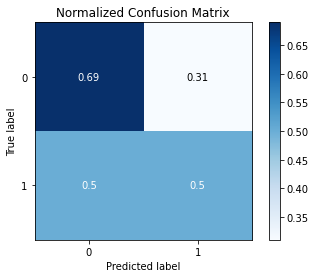

              precision    recall  f1-score   support

           0       0.42      0.69      0.52     33525
           1       0.76      0.50      0.60     63775

    accuracy                           0.57     97300
   macro avg       0.59      0.60      0.56     97300
weighted avg       0.64      0.57      0.58     97300


Erro quadrático médio:  0.4322713257965057

Auroc:
(array([0.        , 0.31030574, 1.        ]), array([0.        , 0.50361427, 1.        ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 2, Features sqrt
Matriz confusão:
[[43108 20666]
 [31437 32337]]



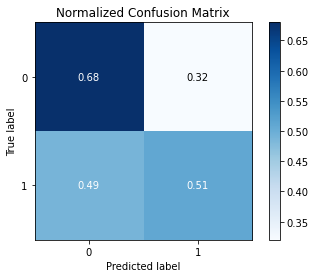

              precision    recall  f1-score   support

           0       0.58      0.68      0.62     63774
           1       0.61      0.51      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.59      0.59      0.59    127548
weighted avg       0.59      0.59      0.59    127548


Erro quadrático médio:  0.4084971932135353

Auroc:
(array([0.        , 0.32405055, 1.        ]), array([0.        , 0.50705617, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22677 10848]
 [31270 32505]]



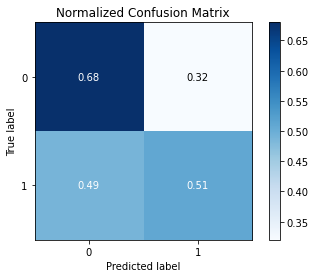

              precision    recall  f1-score   support

           0       0.42      0.68      0.52     33525
           1       0.75      0.51      0.61     63775

    accuracy                           0.57     97300
   macro avg       0.59      0.59      0.56     97300
weighted avg       0.64      0.57      0.58     97300


Erro quadrático médio:  0.43286742034943476

Auroc:
(array([0.        , 0.32357942, 1.        ]), array([0.        , 0.50968248, 1.        ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 5, Features None
Matriz confusão:
[[43589 20185]
 [27794 35980]]



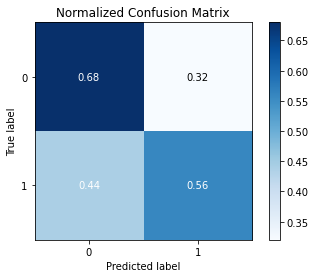

              precision    recall  f1-score   support

           0       0.61      0.68      0.65     63774
           1       0.64      0.56      0.60     63774

    accuracy                           0.62    127548
   macro avg       0.63      0.62      0.62    127548
weighted avg       0.63      0.62      0.62    127548


Erro quadrático médio:  0.37616426756985605

Auroc:
(array([0.        , 0.31650829, 1.        ]), array([0.        , 0.56417976, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23102 10423]
 [27543 36232]]



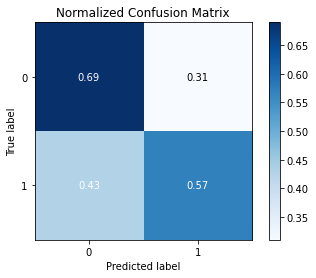

              precision    recall  f1-score   support

           0       0.46      0.69      0.55     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.61     97300
   macro avg       0.62      0.63      0.60     97300
weighted avg       0.67      0.61      0.62     97300


Erro quadrático médio:  0.39019527235354573

Auroc:
(array([0.        , 0.31090231, 1.        ]), array([0.       , 0.5681223, 1.       ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 5, Features sqrt
Matriz confusão:
[[43972 19802]
 [28813 34961]]



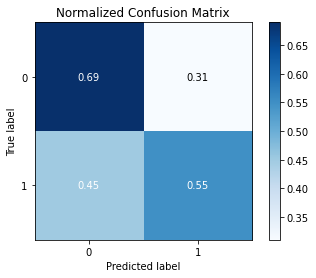

              precision    recall  f1-score   support

           0       0.60      0.69      0.64     63774
           1       0.64      0.55      0.59     63774

    accuracy                           0.62    127548
   macro avg       0.62      0.62      0.62    127548
weighted avg       0.62      0.62      0.62    127548


Erro quadrático médio:  0.38115062564681534

Auroc:
(array([0.        , 0.31050271, 1.        ]), array([0.        , 0.54820146, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23243 10282]
 [28766 35009]]



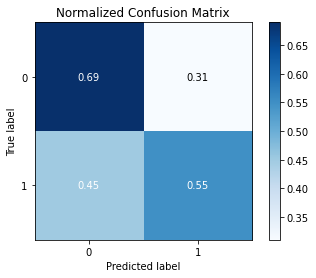

              precision    recall  f1-score   support

           0       0.45      0.69      0.54     33525
           1       0.77      0.55      0.64     63775

    accuracy                           0.60     97300
   macro avg       0.61      0.62      0.59     97300
weighted avg       0.66      0.60      0.61     97300


Erro quadrático médio:  0.40131551901336077

Auroc:
(array([0.       , 0.3066965, 1.       ]), array([0.        , 0.54894551, 1.        ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 8, Features None
Matriz confusão:
[[42332 21442]
 [24872 38902]]



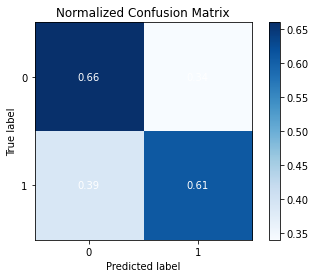

              precision    recall  f1-score   support

           0       0.63      0.66      0.65     63774
           1       0.64      0.61      0.63     63774

    accuracy                           0.64    127548
   macro avg       0.64      0.64      0.64    127548
weighted avg       0.64      0.64      0.64    127548


Erro quadrático médio:  0.36311035845328815

Auroc:
(array([0.        , 0.33621852, 1.        ]), array([0.       , 0.6099978, 1.       ]), array([2, 1, 0]))
Matriz confusão:
[[22511 11014]
 [24744 39031]]



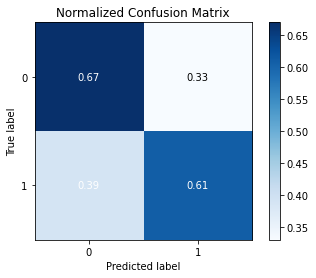

              precision    recall  f1-score   support

           0       0.48      0.67      0.56     33525
           1       0.78      0.61      0.69     63775

    accuracy                           0.63     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.68      0.63      0.64     97300


Erro quadrático médio:  0.36750256937307296

Auroc:
(array([0.        , 0.32853095, 1.        ]), array([0.        , 0.61201098, 1.        ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 8, Features sqrt
Matriz confusão:
[[44124 19650]
 [27092 36682]]



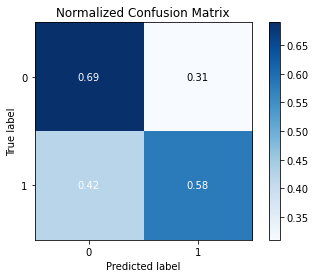

              precision    recall  f1-score   support

           0       0.62      0.69      0.65     63774
           1       0.65      0.58      0.61     63774

    accuracy                           0.63    127548
   macro avg       0.64      0.63      0.63    127548
weighted avg       0.64      0.63      0.63    127548


Erro quadrático médio:  0.3664659579138834

Auroc:
(array([0.       , 0.3081193, 1.       ]), array([0.        , 0.57518738, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23286 10239]
 [26996 36779]]



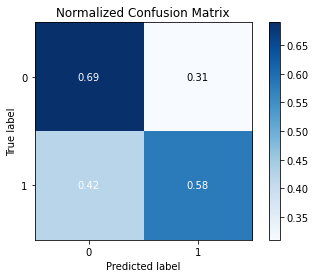

              precision    recall  f1-score   support

           0       0.46      0.69      0.56     33525
           1       0.78      0.58      0.66     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.64      0.61     97300
weighted avg       0.67      0.62      0.63     97300


Erro quadrático médio:  0.3826824254881809

Auroc:
(array([0.        , 0.30541387, 1.        ]), array([0.        , 0.57669933, 1.        ]), array([2, 1, 0]))


In [ ]:
for est in estimators:
  for deep in maxDeep:
    for feat in maxFeatures:
      rf_classifier = RandomForestClassifier(n_estimators=est,max_depth=deep,min_samples_leaf=2,min_samples_split=4,max_features=feat)
      print('params: estimadores {}, maxDepht {}, Features {}'.format(est,deep,feat))
      rf_history = rf_classifier.fit(x_train, y_train)
      
      rf_pred_class_val = rf_classifier.predict(x_validate)
      y_pred_rf_val = pred_name_columns(rf_pred_class_val)
      my_metrics(y_validate,y_pred_rf_val)

      #rf_prb_val = rf_classifer.predict_proba(x_validate)
      # skplt.metrics.plot_ks_statistic(y_validate['IND_BOM_1_1'], rf_prb_val)
      # plt.show()

      rf_pred_class_test = rf_classifier.predict(x_test)
      y_pred_rf_test = pred_name_columns(rf_pred_class_test)
      my_metrics(y_test,y_pred_rf_test)

      #rf_prb_tst = rf_classifer.predict_proba(x_test)
      # skplt.metrics.plot_ks_statistic(y_test['IND_BOM_1_1'], rf_prb_tst)
      # plt.show()

A partir dos resultados estimados no passo acima, o melhor classificador do random forest escolhido foi o que possui n_estimators = 100, max_depth = 9 e features = 'sqrt'

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_leaf=2,min_samples_split=4,max_features='sqrt')
rf_history = rf_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.46      0.70      0.55     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.61     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.67      0.61      0.62     97300

Erro quadrático médio:  0.3875745118191161
Auroc: 0.6324909446106293
Precisão média:  0.7267521651902511



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



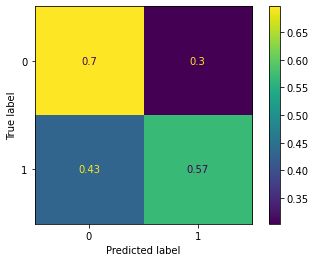

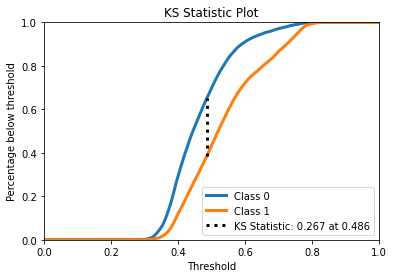

In [ ]:
rf_pred_class_test = rf_classifier.predict(x_test.to_numpy())
y_pred_rf_test = pred_name_columns(rf_pred_class_test)
my_metrics(y_test2,y_pred_rf_test)


rf_prb_test = rf_classifier.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), rf_prb_test)
plt.show()

In [ ]:
def rf(trial):
    max_depth           = trial.suggest_int("max_depth", 2, 16)
    criterion           = trial.suggest_categorical("criterion", ["gini", "entropy"])
    n_estimators        = trial.suggest_int("n_estimators", 8, 32)
    min_samples_leaf    = trial.suggest_int("min_samples_leaf", 2, 8)
    min_samples_split   = trial.suggest_int("min_samples_split", 2, 8)
    random_forest = RandomForestClassifier(n_estimators=n_estimators, 
                                        max_depth=max_depth, 
                                        criterion=criterion, 
                                        bootstrap=True, 
                                        min_samples_leaf=min_samples_leaf, 
                                        min_samples_split=min_samples_split).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

    rf_pred_class_test = random_forest.predict(x_test.to_numpy())
    # rf_prb_test = random_forest.predict_proba(x_test)
    y_pred_rf_test = pred_name_columns(rf_pred_class_test)
    # my_metrics(y_test2,y_pred_rf_test)
    # skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), rf_prb_test)
    # plt.show()a
    acc = accuracy_score(y_test2,y_pred_rf_test)
    return acc

    # rf_pred_class  = random_forest.predict(df_validacao)
    # rf_pred_scores = random_forest.predict_proba(df_validacao)

study_1 = optuna.create_study(direction="maximize")
study_1.optimize(rf, n_trials=64)

[I 2021-12-15 19:15:18,586] A new study created in memory with name: no-name-d71ef8bb-712d-4684-9cfa-9806bc29b12a
[I 2021-12-15 19:15:44,820] Trial 0 finished with value: 0.6036998972250771 and parameters: {'max_depth': 8, 'criterion': 'gini', 'n_estimators': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}. Best is trial 0 with value: 0.6036998972250771.
[I 2021-12-15 19:15:58,076] Trial 1 finished with value: 0.5858170606372045 and parameters: {'max_depth': 3, 'criterion': 'gini', 'n_estimators': 20, 'min_samples_leaf': 7, 'min_samples_split': 8}. Best is trial 0 with value: 0.6036998972250771.
[I 2021-12-15 19:16:35,407] Trial 2 finished with value: 0.617934224049332 and parameters: {'max_depth': 13, 'criterion': 'entropy', 'n_estimators': 12, 'min_samples_leaf': 2, 'min_samples_split': 5}. Best is trial 2 with value: 0.617934224049332.
[I 2021-12-15 19:17:38,435] Trial 3 finished with value: 0.6185919835560123 and parameters: {'max_depth': 11, 'criterion': 'entropy', 'n_estimator

In [ ]:
optuna.visualization.plot_optimization_history(study_1)

In [ ]:
optuna.visualization.plot_slice(study_1)

In [ ]:
optuna.visualization.plot_param_importances(study_1)

In [ ]:
study_1.best_params

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 26}

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=26,max_depth=16,min_samples_leaf=4,min_samples_split=7,max_features='sqrt',criterion='gini')
rf_history = rf_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.48      0.64      0.55     33525
           1       0.77      0.63      0.69     63775

    accuracy                           0.63     97300
   macro avg       0.62      0.64      0.62     97300
weighted avg       0.67      0.63      0.64     97300

Erro quadrático médio:  0.3661459403905447
Auroc: 0.6352267523285601
Precisão média:  0.7271118176084779



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



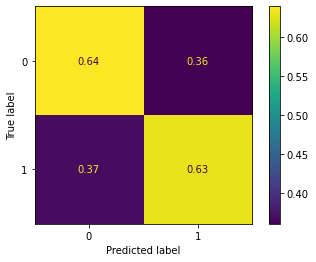

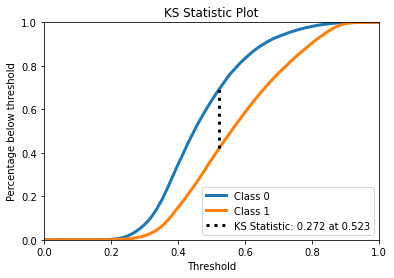

In [ ]:
rf_pred_class_test = rf_classifier.predict(x_test.to_numpy())
y_pred_rf_test = pred_name_columns(rf_pred_class_test)
my_metrics(y_test2,y_pred_rf_test)


rf_prb_test = rf_classifier.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), rf_prb_test)
plt.show()

Comparando o modelo feito manualmente pela equipe com o os melhores parâmetros apresentados pelo optuna, o modelo do estudo do optuna apresentou resultados melhores, com 63% de acurácia e ks de 0.272, além disso o estudo do optuna mostrou que o hiper-parâmetro que possuiu a maior relevância para o classificador foi o de max_depth com 97% de importância.

## Gradient Boost

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def gb(trial):
    loss                = trial.suggest_categorical("loss", ["deviance", "exponential"])
    max_depth           = trial.suggest_int("max_depth", 16, 64)
    subsample           = trial.suggest_float("subsample", 0.01, 0.7)
    n_estimators        = trial.suggest_int("n_estimators", 8, 32)
    learning_rate       = trial.suggest_float("learning_rate", 0.01, 0.7)
    min_samples_leaf    = trial.suggest_int("min_samples_leaf", 2, 8)
    
    gradient_boost = GradientBoostingClassifier(n_estimators = n_estimators, 
                                            max_depth = max_depth, 
                                            min_samples_leaf = min_samples_leaf, 
                                            learning_rate = learning_rate, 
                                            loss = loss, 
                                            subsample = subsample).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

    gb_pred_class_test = gradient_boost.predict(x_test.to_numpy())
    # rf_prb_test = random_forest.predict_proba(x_test)
    y_pred_gb_test = pred_name_columns(gb_pred_class_test)
    # my_metrics(y_test2,y_pred_rf_test)
    # skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), rf_prb_test)
    # plt.show()a
    acc = accuracy_score(y_test2,y_pred_gb_test)
    return acc

study_2 = optuna.create_study(direction="maximize")
study_2.optimize(gb, n_trials=64)

[I 2021-12-15 23:06:31,311] A new study created in memory with name: no-name-b3673a0f-fd2e-4cae-98e4-e7667faf6a68
[I 2021-12-15 23:12:24,386] Trial 0 finished with value: 0.5989414182939363 and parameters: {'loss': 'deviance', 'max_depth': 53, 'subsample': 0.1309785600369982, 'n_estimators': 29, 'learning_rate': 0.24932527414600886, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.5989414182939363.
[I 2021-12-15 23:17:51,537] Trial 1 finished with value: 0.6101336073997945 and parameters: {'loss': 'deviance', 'max_depth': 23, 'subsample': 0.3079009258506013, 'n_estimators': 13, 'learning_rate': 0.4274337999965276, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.6101336073997945.
[I 2021-12-15 23:31:36,005] Trial 2 finished with value: 0.6186742034943474 and parameters: {'loss': 'exponential', 'max_depth': 49, 'subsample': 0.2072925443369491, 'n_estimators': 29, 'learning_rate': 0.34389430088095535, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.6186742034943474.
[I 20

KeyboardInterrupt: ignored

In [ ]:
gradient_boost = GradientBoostingClassifier(n_estimators = 28, 
                                            max_depth = 62, 
                                            min_samples_leaf = 7, 
                                            learning_rate = 0.49109966110029046, 
                                            loss = 'deviance', 
                                            subsample = 0.6811509590280894).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.49      0.38      0.43     33525
           1       0.71      0.79      0.75     63775

    accuracy                           0.65     97300
   macro avg       0.60      0.59      0.59     97300
weighted avg       0.63      0.65      0.64     97300

Erro quadrático médio:  0.3520760534429599
Auroc: 0.5852774788790406
Precisão média:  0.6970736725790391



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



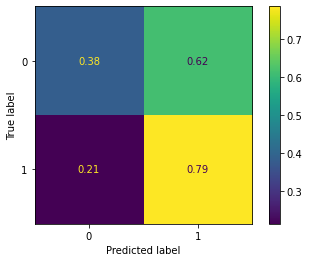

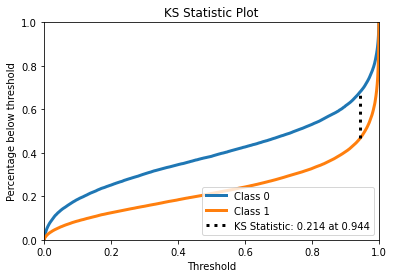

In [ ]:
gb_pred_class_test = gradient_boost.predict(x_test.to_numpy())
y_pred_gb_test = pred_name_columns(gb_pred_class_test)
my_metrics(y_test2,y_pred_gb_test)


gb_prb_test = gradient_boost.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), gb_prb_test)
plt.show()

##Ensemble

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, optimizers, losses
from sklearn.neural_network import MLPClassifier
from scipy import stats

In [ ]:
y_train2.describe()

,IND_BOM_1_1
count,255098.000000
mean,0.500000
std,0.500001
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
print(y_train)
print(y_train2)

        IND_BOM_1_1  IND_BOM_1_2
55576             0            1
106124            1            0
325647            0            1
4823              1            0
333519            0            1
...             ...          ...
255489            1            0
112570            0            1
213661            0            1
382764            1            0
336509            1            0

[255098 rows x 2 columns]
        IND_BOM_1_1
55576             0
106124            1
325647            0
4823              1
333519            0
...             ...
255489            1
112570            0
213661            0
382764            1
336509            1

[255098 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.63      0.69      0.66     63774
           1       0.66      0.60      0.63     63774

    accuracy                           0.64    127548
   macro avg       0.64      0.64      0.64    127548
weighted avg       0.64      0.64      0.64    127548

Erro quadrático médio:  0.35761438830871517
Auroc: 0.6423856116912848
Precisão média:  0.5934812877529794



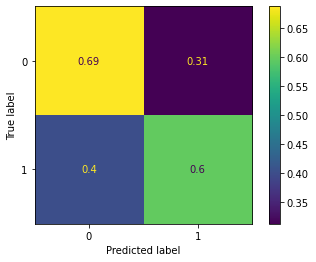

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier

rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_leaf=2,min_samples_split=4,max_features='sqrt')
mlp8 = MLPClassifier(hidden_layer_sizes=(50,50), solver='adam', activation='relu', learning_rate_init=0.005, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1)
mlp9 = MLPClassifier(hidden_layer_sizes=(100,50,25), solver='adam', activation='relu', learning_rate_init=0.005, max_iter=10000, 
                    early_stopping=True, n_iter_no_change=20, validation_fraction=0.1)

ensemble_classifier = VotingClassifier(
            estimators=[('mlp1', mlp8), ('rf', rf_classifier), ('mlp2', mlp9)], 
            voting='soft')

mlp8.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
rf_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
mlp9.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
ensemble_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

ensemble_pred_class_val = ensemble_classifier.predict(x_validate)
y_pred_ensemble_val = pred_name_columns(ensemble_pred_class_val)
my_metrics(y_validate,y_pred_ensemble_val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



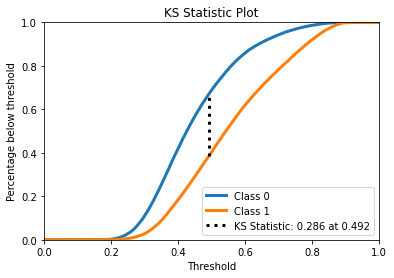

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.47      0.69      0.56     33525
           1       0.78      0.59      0.68     63775

    accuracy                           0.63     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.68      0.63      0.64     97300

Erro quadrático médio:  0.3727029804727646
Auroc: 0.6421447862559783
Precisão média:  0.7323180101111031



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



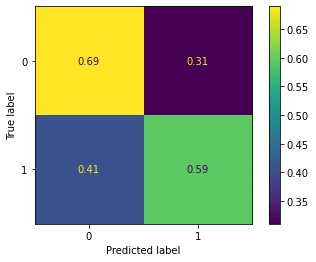

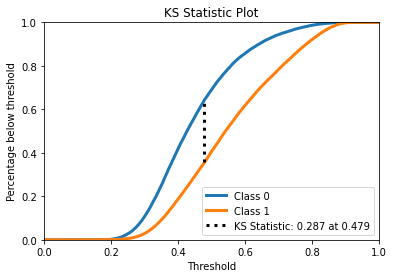

In [ ]:
ensemble_prb_val = ensemble_classifier.predict_proba(x_validate)
skplt.metrics.plot_ks_statistic(y_validate['IND_BOM_1_1'], ensemble_prb_val)
plt.show()

ensemble_pred_class_test = ensemble_classifier.predict(x_test)
y_pred_ensemble_test = pred_name_columns(ensemble_pred_class_test)
my_metrics(y_test,y_pred_ensemble_test)

ensemble_prb_test = ensemble_classifier.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test['IND_BOM_1_1'], ensemble_prb_test)
plt.show()

##SVM

In [50]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

### Modelo 1

In [ ]:
clf = LinearSVC(C=1.3, max_iter=10000)
clf.fit(x_train,y_train['IND_BOM_1_1'])
y_pred = clf.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test['IND_BOM_1_1'], y_pred))

              precision    recall  f1-score   support

           0       0.46      0.66      0.54     33525
           1       0.77      0.60      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300



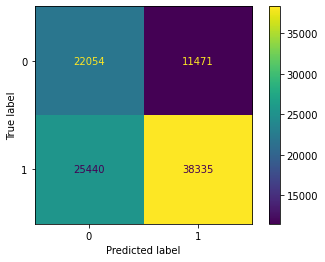

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test['IND_BOM_1_1'], y_pred);

### Modelo 2

In [ ]:
clf = LinearSVC(max_iter=10000)
clf.fit(x_train,y_train['IND_BOM_1_1'])
y_pred = clf.predict(x_test)

In [ ]:
print(classification_report(y_test['IND_BOM_1_1'], y_pred))

              precision    recall  f1-score   support

           0       0.46      0.66      0.54     33525
           1       0.77      0.60      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300



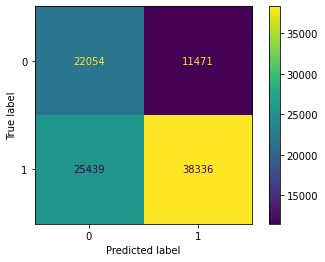

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test['IND_BOM_1_1'], y_pred);

### Modelo 3

In [ ]:
clf = SGDClassifier(max_iter=10000)
clf.fit(x_train,y_train['IND_BOM_1_1'])
y_pred = clf.predict(x_test)

In [ ]:
print(classification_report(y_test['IND_BOM_1_1'], y_pred))

              precision    recall  f1-score   support

           0       0.46      0.67      0.55     33525
           1       0.77      0.59      0.67     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300



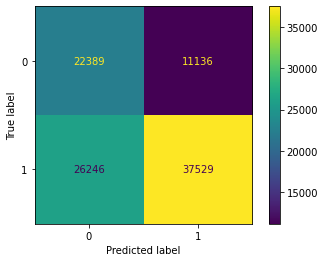

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test['IND_BOM_1_1'], y_pred);

##Meta Classificador

In [45]:
#Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_leaf=2,min_samples_split=4,max_features='sqrt')
rf_history = rf_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
rf_pred_class_test = rf_classifier.predict(x_test.to_numpy())
y_pred_rf_test = pred_name_columns(rf_pred_class_test)

In [54]:
y_pred_rf_test.head(10)

,IND_BOM_1_1
0,1
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [47]:
#MLP
mlp_opt = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    solver='lbfgs',
                    activation='identity',
                    learning_rate= 'adaptive',
                    learning_rate_init=np.arange( 0.01, 0.047),
                    hidden_layer_sizes=(11,2),
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

mlp_pred_class_test = mlp_opt.predict(x_test.to_numpy())
mlp_prb_test = mlp_opt.predict_proba(x_test)
y_pred_mlp_test = pred_name_columns(mlp_pred_class_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [55]:
y_pred_mlp_test.head(10)

,IND_BOM_1_1
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,0
9,0


In [92]:
#SVM
svm_clf = SGDClassifier(max_iter=10000)
svm_clf.fit(x_train,y_train['IND_BOM_1_1'])
y_pred = svm_clf.predict(x_test)
y_pred_svm_test = pred_name_columns(y_pred)

In [93]:
y_pred_svm_test.head(10)

,IND_BOM_1_1
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [95]:
meta_dataset = pd.concat([y_pred_rf_test.rename(columns={'IND_BOM_1_1': 'rf'}), y_pred_mlp_test.rename(columns={'IND_BOM_1_1': 'mlp'}), y_pred_svm_test.rename(columns={'IND_BOM_1_1': 'svm'})], axis=1)

In [96]:
meta_dataset.describe

<bound method NDFrame.describe of        rf  mlp  svm
0       1    0    0
1       0    0    0
2       1    1    1
3       1    1    1
4       0    1    0
...    ..  ...  ...
97295   0    0    0
97296   1    1    1
97297   0    0    0
97298   0    0    0
97299   1    1    1

[97300 rows x 3 columns]>

In [98]:
y_test['IND_BOM_1_1'].describe

<bound method NDFrame.describe of 29486     1
283591    0
173462    1
265678    1
105986    1
         ..
101845    1
289571    1
333984    0
176554    1
279357    1
Name: IND_BOM_1_1, Length: 97300, dtype: int64>

In [116]:
#Para testar o meta classificador:
rf_pred_class_valid = rf_classifier.predict(x_validate.to_numpy())
y_pred_rf_valid = pred_name_columns(rf_pred_class_valid)

mlp_pred_class_valid = mlp_opt.predict(x_validate.to_numpy())
y_pred_mlp_valid = pred_name_columns(mlp_pred_class_valid)

y_pred_svm = svm_clf.predict(x_validate)
y_pred_svm_valid = pred_name_columns(y_pred_svm)

meta_dataset_valid = pd.concat([y_pred_rf_valid.rename(columns={'IND_BOM_1_1': 'rf'}), y_pred_mlp_valid.rename(columns={'IND_BOM_1_1': 'mlp'}), y_pred_svm_valid.rename(columns={'IND_BOM_1_1': 'svm'})], axis=1)

In [115]:
#Meta Classificador GB
gradient_boost = GradientBoostingClassifier(n_estimators = 28, 
                                            max_depth = 62, 
                                            min_samples_leaf = 7, 
                                            learning_rate = 0.49109966110029046, 
                                            loss = 'deviance', 
                                            subsample = 0.6811509590280894).fit(meta_dataset.to_numpy(), y_test2.to_numpy().ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWar

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     63774
           1       0.50      1.00      0.67     63774

    accuracy                           0.50    127548
   macro avg       0.25      0.50      0.33    127548
weighted avg       0.25      0.50      0.33    127548

Erro quadrático médio:  0.5
Auroc: 0.5
Precisão média:  0.5



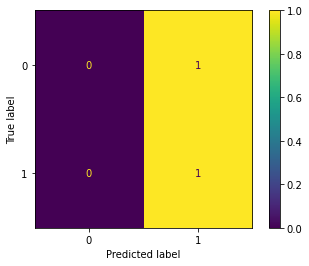

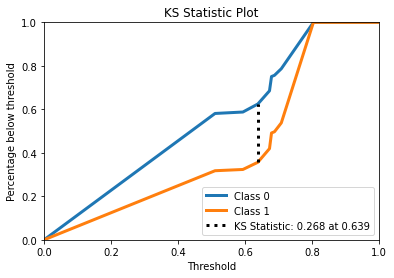

In [117]:
#Testando o meta classificador
gb_pred_class_validate = gradient_boost.predict(meta_dataset_valid.to_numpy())
y_pred_gb_valid = pred_name_columns(gb_pred_class_validate)
my_metrics(y_validate2,y_pred_gb_valid)


gb_prb_valid = gradient_boost.predict_proba(meta_dataset_valid)
skplt.metrics.plot_ks_statistic(y_validate2.to_numpy().ravel(), gb_prb_valid)
plt.show()